In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [96]:
df_test= pd.read_excel('Real estate valuation data set.xlsx',  nrows=10)

x = df_test.iloc[:, 1:7].values.transpose().tolist()


for line in x:
    for i in range(len(line)):
        line[i] = (line[i] -min(line))/(max(line)-min(line))


x = np.array(x)
y = df_test.iloc[:, 7].values.tolist()


[[2012.9166667, 2012.9166667, 2013.5833333, 2013.5, 2012.8333333, 2012.6666667, 2012.6666667, 2013.4166667, 2013.5, 2013.4166667], [32.0, 19.5, 13.3, 13.3, 5.0, 7.1, 34.5, 20.3, 31.7, 17.9], [84.87882, 306.5947, 561.9845, 561.9845, 390.5684, 2175.03, 623.4731, 287.6025, 5512.038, 1783.18], [10.0, 9.0, 5.0, 5.0, 5.0, 3.0, 7.0, 6.0, 1.0, 3.0], [24.98298, 24.98034, 24.98746, 24.98746, 24.97937, 24.96305, 24.97933, 24.98042, 24.95095, 24.96731], [121.54024, 121.53951, 121.54391, 121.54391, 121.54245, 121.51254, 121.53642, 121.54228, 121.48458, 121.51486]]
[[0.27272729256195555, 0.9996688704673731, 1.0, 1.0, 0.9996688567112925, 0.9995860709263692, 0.9995860709263692, 0.9999586071075384, 1.0, 1.0], [0.9152542372881356, 0.5533686601059804, 0.37549031632232094, 0.37874565242060276, 0.13551871445319721, 0.20266510725642645, 1.0, 0.6388345527724546, 1.0, 1.0], [0.0, 0.05562274788381358, 0.10195584645824286, 0.10195584645824286, 0.07085734895151304, 0.39459633623715956, 0.11311117593891772, 0.052

In [98]:
def forward(W1, W2, b1, b2, x):
   
    f1 = np.dot(W1, x) + b1
    sigma = 1 / (1 + np.exp(-f1))
    f = np.dot(W2, sigma) + b2

    return f

def funcion_objetivo(x, y, W1, W2, b1, b2):


    loss = 0.5 * (np.power(forward(W1, W2, b1, b2, x) - y, 2)) 
    return loss

In [48]:
#Inicializacion de pesos
W1 = np.random.random((5,6))
b1 = np.random.random((5,1))

W2 = np.random.random((1,5))
b2 = np.random.random((1,1))



In [119]:
#Calculo del gradiente numerico

def funcion_objetivo(x, y, W1, W2, b1, b2):
    loss = 0.5 * (np.power(forward(W1, W2, b1, b2, x) - y, 2)) 
    return loss

def numerical_gradient(W1, W2, b1, b2, x, y, epsilon):
    #Tenemos que calcular el gradiente de la función objetivo en un punto, que equivale a computar las siguientes derivadas parciales respecto a cada elemento de las matrices W y los vectores b.

    der_W1 = (funcion_objetivo(x, y, W1 + epsilon, W2, b1, b2) - funcion_objetivo(x, y, W1 - epsilon, W2, b1, b2)) / (2 * epsilon)
    der_W2 = (funcion_objetivo(x, y, W1, W2 + epsilon, b1, b2) - funcion_objetivo(x, y, W1, W2 - epsilon, b1, b2)) / (2 * epsilon)
    der_b1 = (funcion_objetivo(x, y, W1, W2, b1 + epsilon, b2) - funcion_objetivo(x, y, W1, W2, b1 - epsilon, b2)) / (2 * epsilon)
    der_b2 = (funcion_objetivo(x, y, W1, W2, b1, b2 + epsilon) - funcion_objetivo(x, y, W1, W2, b1, b2 - epsilon)) / (2 * epsilon)  


    return der_W1, der_W2, der_b1, der_b2

In [132]:
#funcion fit y loop de entrenamiento
#Implementar el método fit() que realiza el ciclo de entrenamiento de la red. En cada iteración, se calcula el valor del gradiente promedio para todas las muestras del dataset y se actualizan los parámetros de la función utilizando esta dirección.

def fit(x, y, learning_rate=0.001, epochs=1000, eps=1e-6):
    #Inicializacion de pesos
    W1 = np.random.random((5,6))
    b1 = np.random.random((5,1))
    W2 = np.random.random((1,5))
    b2 = np.random.random((1,1))

    loss_accum = []
    for iteracion in range(epochs):
        der_W1, der_W2, der_b1, der_b2 = numerical_gradient(W1, W2, b1, b2, x, y, eps)
        #Una vez que calculamos todos estos gradientes, podemos usarlos para actualizar la red. Hacemos esto restando una pequeña cantidad de cada derivada parcial al parámetro correspondiente. Esta cantidad es controlada por un parámetro llamado learning rate o tasa de aprendizaje.
        #Es decir, para nuestro espacio de parámetros θ, calculamos:
        W1 = W1 - learning_rate *np.mean(der_W1)
        W2 = W2 - learning_rate * np.mean(der_W2)
        b1 = b1 - learning_rate *np.mean( der_b1)
        b2 = b2 - learning_rate *np.mean( der_b2)
        
        loss_accum.append(np.mean(funcion_objetivo(x, y, W1, W2, b1, b2)))

    return loss_accum, W1, W2, b1, b2

In [101]:
def predict(x,W1, W2, b1, b2):
        y = forward(W1, W2, b1, b2, x)
        return y

[102.4120823365175, 102.38703374418692, 102.36209956491454, 102.33727923337212, 102.31257218704802, 102.28797786623332, 102.26349571400799, 102.239125176227, 102.21486570150651, 102.19071674121022]
maximo:  691.9358254302227
minimo:  102.19071674121022

[[1.57149269 0.82813345 1.70141088 1.51428928 0.79388176 1.18832615]
 [1.40791505 1.29730287 0.88113851 1.16042601 0.79154783 1.18596841]
 [0.90412764 1.41556458 1.71428603 0.9055849  1.48442176 1.65929067]
 [0.82288079 0.94766738 1.17452479 1.19121685 1.19786584 1.55885616]
 [1.14638419 0.80963204 1.5109326  1.40205887 1.28094002 0.8240855 ]]

[[6.21445057 7.03645849 6.1638504  7.0113802  6.86370043]]

[[1.81972051]
 [1.92716853]
 [1.15267535]
 [1.93285723]
 [1.92901154]]

[[2.28665994]]


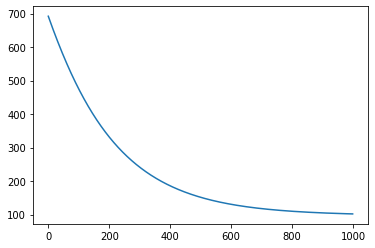

In [150]:
df_test= pd.read_excel('Real estate valuation data set.xlsx',  nrows=10000)

x = df_test.iloc[:, 1:7].values.transpose().tolist()
mean = lambda x: sum(x) / len(x)
std = lambda x: (sum([(i - mean(x))**2 for i in x]) / len(x))**0.5

for line in x:
    for i in range(len(line)):

        line[i] = (line[i] -mean(line))/(std(line))



x = np.array(x)

y = df_test.iloc[:, 7].values.tolist()


loss, W1, W2, b1, b2 = fit(x, y, learning_rate=0.0001, epochs=1000,eps=0.01)
print(loss[-10:])
print()
print('maximo: ', max(loss))
print('minimo: ', min(loss))
print()

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.plot(loss)

## Pruebo predecir con los datos de entrenamiento los datos de prueba

In [ ]:
df_train= pd.read_excel('Real estate valuation data set.xlsx',  nrows=315,index_col=0)

x = df_train.iloc[:, 1:7].values.transpose().tolist()
mean = lambda x: sum(x) / len(x)
std = lambda x: (sum([(i - mean(x))**2 for i in x]) / len(x))**0.5
for line in x:
    for i in range(len(line)):
        line[i] = (line[i] -mean(line))/(std(line))
x = np.array(x)
y = df_train.iloc[:, 7].values.tolist()
loss, W1, W2, b1, b2 = fit(x, y, learning_rate=0.0001, epochs=1000,eps=0.01)

In [ ]:
df_prueba = pd.read_excel('Real estate valuation data set.xlsx',  nrows=414, skiprows=315)
x = df_prueba.iloc[:, 1:7].values.transpose().tolist()
mean = lambda x: sum(x) / len(x)
std = lambda x: (sum([(i - mean(x))**2 for i in x]) / len(x))**0.5
for line in x:
    for i in range(len(line)):
        line[i] = (line[i] -mean(line))/(std(line))
x = np.array(x)
y =np.array( df_prueba.iloc[:, 7].values.tolist())

pred = predict(x,W1, W2, b1, b2)
print(np.mean(y-pred))

## Buscamos los hipérparametros óptimos para el modelo de regresión
Realizamos un muestreo de parametros y comparamos sus loss values para encontrar los mejores parametros para el modelo de regresión. Guardamos los resultados en un archivo csv.

### Funcion que itera los hiperparametros

In [137]:
def train_model(eps_range, learning_rate_range, epochs_range,x, y):
    training_list = []
    for eps in range(eps_range[0], eps_range[1]):
        for learning_rate in range(learning_rate_range[0], learning_rate_range[1]):
            for epochs in range(epochs_range[0], epochs_range[1]):
                loss, W1, W2, b1, b2 = fit(x, y, learning_rate=1*(10**-learning_rate), epochs=10**epochs,eps=10**-eps)
                training_list.append([loss[-1], epochs, learning_rate, eps])
    return training_list









### Ejecuto la funcion con distintos rangos de hiperparametros

In [156]:
df_test= pd.read_excel('Real estate valuation data set.xlsx',  nrows=10000)


x = df_test.iloc[:, 1:7].values.transpose().tolist()
mean = lambda x: sum(x) / len(x)
std = lambda x: (sum([(i - mean(x))**2 for i in x]) / len(x))**0.5

for line in x:
    for i in range(len(line)):

        line[i] = (line[i] -mean(line))/(std(line))

x = np.array(x)
y = df_test.iloc[:, 7].values.tolist()


training_list = train_model([2, 6], [2, 6], [2, 5], x, y)
losses = [x[0] for x in training_list]

pd.DataFrame(training_list).to_csv('training.csv',sep=';', index=False, header=['loss', 'epochs', 'learning_rate', 'eps'])

PermissionError: [Errno 13] Permission denied: 'training.csv'